In [33]:
# libraries we have used
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [34]:
#================================STEP 1:  IMPORTING DATASETS AND BASIC INFO==============================================

In [35]:

# importing the datset and naming the columns according to the dataset source

# datset source http://205.174.165.80/CICDataset/NSL-KDD/Dataset/


# column names imported from the datset


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

# importing the train data into pandas dataframe
data = pd.read_csv("KDDTrain+.csv", header = None, names = col_names)


#importing the test data into pandas dataframe
data_test = pd.read_csv("KDDTest+.csv", header =None, names= col_names)



In [36]:
# displaying the first five rows of dataset

data_test.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [37]:
# showing the number of rows and columns in the data
data.shape


(125973, 43)

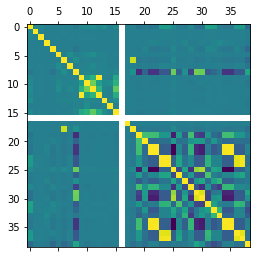

In [38]:
# applying the correlation between the features to check the desity of inter feature relation
plt.matshow(data.corr())# this function shows all the correlation between the featues so we can check which feature is more strongly connected to other feature

In [39]:
 # as per the research paper  A Detailed analysis of the KDD CUP 99 Data Set there are total four kinds of attacks found in this dataset
'''
   1) Denial of Service Attack (DoS): is an attack in
which the attacker makes some computing or memory
resource too busy or too full to handle legitimate requests,
or denies legitimate users access to a machine.
2) User to Root Attack (U2R): is a class of exploit in
which the attacker starts out with access to a normal
user account on the system (perhaps gained by snifﬁng
passwords, a dictionary attack, or social engineering)
and is able to exploit some vulnerability to gain root
access to the system.
3) Remote to Local Attack (R2L): occurs when an
attacker who has the ability to send packets to a
machine over a network but who does not have an
account on that machine exploits some vulnerability to
gain local access as a user of that machine.
4) Probing Attack: is an attempt to gather information
about a network of computers for the apparent purpose
of circumventing its security controls.
   '''
# we will now intruduce a new column of attack class which is determined by the mappings provided for each attack
    
    

'\n  1) Denial of Service Attack (DoS): is an attack in\nwhich the attacker makes some computing or memory\nresource too busy or too full to handle legitimate requests,\nor denies legitimate users access to a machine.\n2) User to Root Attack (U2R): is a class of exploit in\nwhich the attacker starts out with access to a normal\nuser account on the system (perhaps gained by snifﬁng\npasswords, a dictionary attack, or social engineering)\nand is able to exploit some vulnerability to gain root\naccess to the system.\n3) Remote to Local Attack (R2L): occurs when an\nattacker who has the ability to send packets to a\nmachine over a network but who does not have an\naccount on that machine exploits some vulnerability to\ngain local access as a user of that machine.\n4) Probing Attack: is an attempt to gather information\nabout a network of computers for the apparent purpose\nof circumventing its security controls.\n  '

In [40]:
# =======================================STEP 2: SIMPLIFYING THE FEATURE (LABEL) TO IMPROVE RESULT=======================================================

In [41]:
'''first of all as mentioned above we are going to replace the label column by 4 mentioned types of attacks and to replace it
for each label we must have some mapping or scheme. so below is the mapping provided by the source:

'''
# furthermore this step will make us easy to detect intrusions and apply ml algorithms

mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }



# now replacing the label with  a new column attack class


data['attack_class'] = data['label'].apply(lambda v: mapping[v])
data_test['attack_class'] = data_test['label'].apply(lambda v: mapping[v])

# dropping the old label column which we dont need now
data.drop(['label'], axis=1, inplace=True)
data_test.drop(['label'], axis=1, inplace=True)

In [42]:
data['attack_class']

0         Normal
1         Normal
2            DoS
3         Normal
4         Normal
           ...  
125968       DoS
125969    Normal
125970    Normal
125971       DoS
125972    Normal
Name: attack_class, Length: 125973, dtype: object

In [43]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,Normal


In [44]:
#=========================STEP3: EDA Exploratory Data Analysis===============================================

In [45]:
# feature wise statistical analysis
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [46]:
data['attack_class'].describe()

count     125973
unique         5
top       Normal
freq       67343
Name: attack_class, dtype: object

In [47]:
# checking the distribution trends among the attack classses

# calculating the frequency of each type of attack

attack_class_frequency = data[['attack_class']].apply(lambda x: x.value_counts())

attack_class_frequency['frequency_percent_train'] = (100 * attack_class_frequency / attack_class_frequency.sum())
attack_class_distribution = pd.concat([attack_class_frequency], axis=1)
attack_class_distribution

,attack_class,frequency_percent_train
Normal,67343,53.458281
DoS,45927,36.457812
Probe,11656,9.252776
R2L,995,0.789852
U2R,52,0.041279


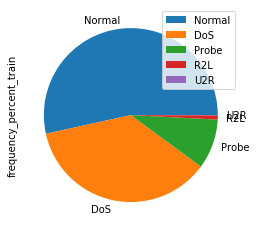

In [48]:
# visual representation of above results

plotting_freq = attack_class_distribution[['frequency_percent_train']].plot(kind="pie",subplots=True)

In [49]:
#=================================STEP 4 : DATA PREPROCESSING ========================================================

In [50]:

# pre-processing refers to the transformations applied to 
#your data before feeding it to the algorithm. In python, scikit-learn library has a
# pre-built functionality under sklearn.preprocessing.


In [51]:
#importing the scaler 
# scaling is used only for numerical 
# standard scaling has been used to minimize the variance in features including  continous numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64','int64']))

scaled_data_test = scaler.fit_transform(data_test.select_dtypes(include=['float64','int64']))

In [52]:
# showing the results of numerical features after applying scaler(converted to np array) MUST BE CONVERTED BACK TO DATAFRAME

scaled_columns=[]
for col in data.columns.values:
# Encoding only categorical variables
    if data[col].dtypes=='float64'or data[col].dtypes=='int64':
        scaled_columns.append(data[col].name)


scaled_data = pd.DataFrame(scaled_data,columns = scaled_columns)
scaled_data.head()



,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823


In [53]:
# the next step of data preprocessing is to convert all the categorial attributes to encodings so they can be easily used 
# in the training models and provide more accurate results
#========================================FEATURE ENCODING==============================================

#Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values
#. LabelEncoder encode labels with value between 0 and n_classes-1



from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
attacks_train = data[['attack_class']].copy()
attacks_test = data_test[['attack_class']].copy()
# dropping the attack class because we dont need its encodings
data.drop(['attack_class'], axis=1)
data_test.drop(['attack_class'], axis=1)


# Iterating over all the common columns in train data

for col in data.columns.values:
# Encoding only categorical variables
    if data[col].dtypes=='object':

        data[col]= le.fit_transform(data[col])
        print(data[col])
        

        
        

0         1
1         2
2         1
3         1
4         1
         ..
125968    1
125969    2
125970    1
125971    1
125972    1
Name: protocol_type, Length: 125973, dtype: int32
0         20
1         44
2         49
3         24
4         24
          ..
125968    49
125969    49
125970    54
125971    30
125972    20
Name: service, Length: 125973, dtype: int32
0         9
1         9
2         5
3         9
4         9
         ..
125968    5
125969    9
125970    9
125971    5
125972    9
Name: flag, Length: 125973, dtype: int32
0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: attack_class, Length: 125973, dtype: int32


In [54]:
data.head()  # all categorial data has been converted to encodings now they can be used in ml models

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty,attack_class
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,1
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,1
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,1


In [55]:
# the next step is of data sampling in the dataset
#Data sampling is a statistical analysis technique used to select, 
#manipulate and analyze a representative subset of data points
#to identify patterns and trends in the larger data set being examined
#'''Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
#Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
#Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.
#'''

In [56]:
# we apply random oversampling to balance the data by sampling the minority class with replacement

# reshape target column attack_class to 1D array shape 1 d array is made because the random oversampling requires so
c, r = attacks_train.values.shape
y_train = attacks_train.values.reshape(c,)
print(y_train.size ,'is the size of 1 dimensional np array ')
#reshaping the target column in test dataset
d, e = attacks_test.values.shape
y_test = attacks_test.values.reshape(d,)

125973 is the size of 1 dimensional np array 


In [64]:
#importing the imbalanced learn library
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
#making a random over sampling function focused on over sampling the minority class
func = RandomOverSampler(sampling_strategy = 'minority')


#doing the oversampling in the training dataset
x_overs, y_overs = func.fit_resample(data,y_train)
#results of oversampling

print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_overs)))



Original dataset shape Counter({'Normal': 67343, 'DoS': 45927, 'Probe': 11656, 'R2L': 995, 'U2R': 52})
Resampled dataset shape Counter({'Normal': 67343, 'U2R': 67343, 'DoS': 45927, 'Probe': 11656, 'R2L': 995})


In [ ]:
#in the above output it can be observed that the oversampling has been done and minority classes have been filled with copies 
#to make the elements in minority calss greater so ml algorithm can give more accurate results